# LA RECURSIVITE

In [ ]:
#un module utile pour visualiser le fonctionnement de votre code
from tutor import tutor
#il suffit ensuite d'ajouter tutor() avant ou après le code, dans la cellule a visualiser

## Un peu de math

### Suite 1

Ecrivez une fonction **suiteRecurs1(n)** récursive, qui renvoi le terme n de la suite :  
- u<sub>0</sub> = 5
- u<sub>n</sub> = u<sub>n-1</sub> *3 + 4
- Calcul à la main des premiers termes : 5, 19, 61, 187, 565, …


In [29]:
@viz
def suiteRecurs1(n):
    if n==0:
        return 5
    else:
        return suiteRecurs1(n-1)*3+4
suiteRecurs1(5)

1699

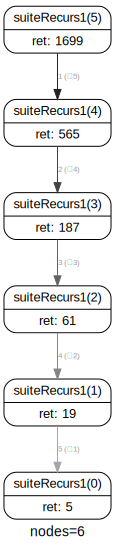

In [30]:
suiteRecurs1.callgraph()

### Somme

Proposez une fonction **somme(a, b)** récursive de calcul de la somme de deux entiers naturels a et b en supposant que les seules opérations de base dont vous disposez sont :  
- l'ajout de 1 à un entier a : a + 1
- le retrait de 1 à un entier a : a − 1
- et les comparaisons à 0 d'un entier a : a == 0, a > 0 et a < 0


In [31]:
#en faisant la somme a la descente
@viz
def somme(a,b):
    if b==0:
        return a
    else:
        return somme(a+1, b-1)
somme(4,5)

9

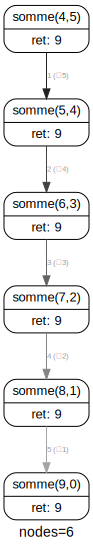

In [32]:
somme.callgraph()

In [33]:
#ou en faisant la somme à la remontée
@viz
def somme2(a,b):
    if b==0:
        return a
    else:
        return somme2(a, b-1) + 1
somme2(4, 5)

9

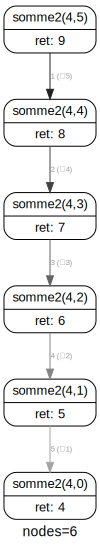

In [34]:
somme2.callgraph()

### Produit

Proposez une fonction **produit(a, b)** récursive de calcul du produit de deux entiers naturels a et b en supposant que les seules opérations de base dont vous disposez sont :
- la somme de deux entiers a et b : a + b
- le retrait de 1 à un entier a : a − 1


In [35]:
@viz
def produit(a, b):
    if a==1:
        return b
    else:
        return produit(a-1, b) + b
produit(4, 5)

20

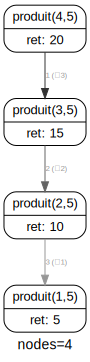

In [36]:
produit.callgraph()

### Factorielle

En mathématiques, la factorielle d'un entier naturel n (notée n !) est le produit des nombres entiers strictement positifs inférieurs ou égaux à n. Exemple :  
5 ! = 1 · 2 · 3 · 4 · 5 = 120  
Proposez une fonction **factRecurs(x)** récursive, qui renvoi x ! et qui n’utilise que la multiplication.


In [37]:
@viz
def factRecurs(x):
    if x == 1:
        return 1
    else:
        return x*factRecurs(x-1)
factRecurs(5)

120

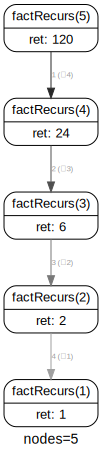

In [38]:
factRecurs.callgraph()

###  Nombre de chiffre

Réalisez une fonction récursive **nbChiffre(x)** qui retourne le nombre de chiffre qui compose le nombre entier x.

In [39]:
@viz
def nbChiffre(x):
    if x < 10:
        return 1
    return nbChiffre(x//10)+1
nbChiffre(123456)

6

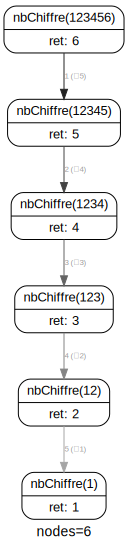

In [41]:
nbChiffre.callgraph()

### Suite 2

Ecrivez une fonction **suiteRecurs2(n)** récursive, qui renvoi le terme n de la suite :
- u<sub>0</sub> = 5
- u<sub>1</sub> = 10
- u<sub>n</sub> = u<sub>n-2</sub> + u<sub>n-1</sub> * 2 + 4

Visualisez le fonctionnement de votre code avec rcviz

Calculez u<sub>30</sub> avec cette fonction. Que constatez-vous ?  


In [45]:
@viz
def suiteRecurs2(n):
    if n == 0:
        return 5
    if n == 1:
        return 10
    else:
        return suiteRecurs2(n-2)+suiteRecurs2(n-1)*2+4
suiteRecurs2(6)

1041

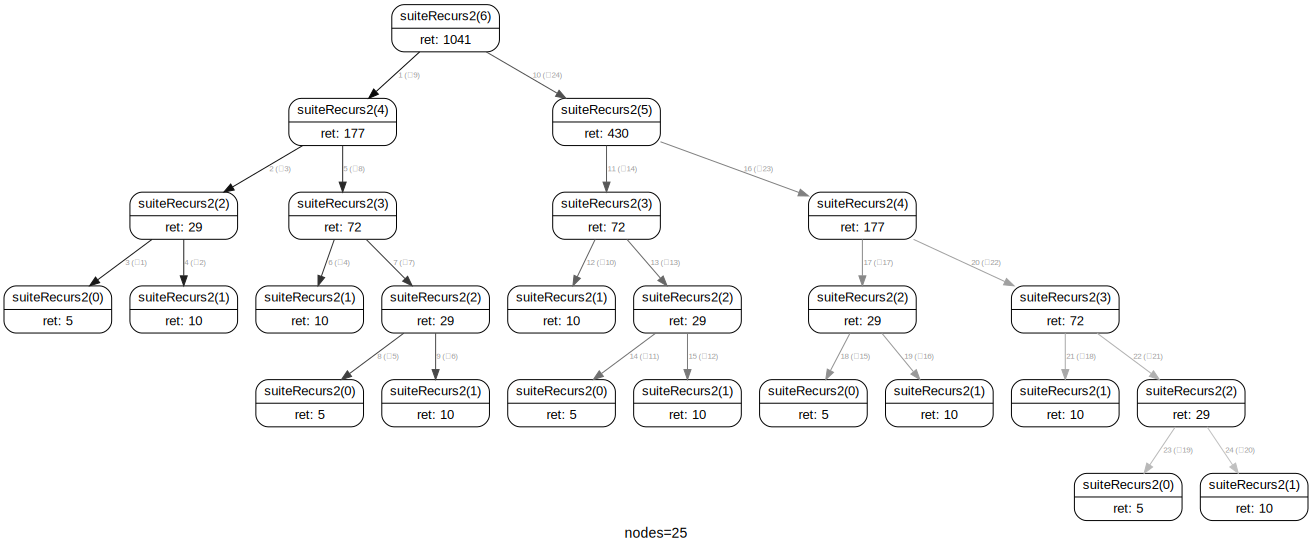

In [46]:
suiteRecurs2.callgraph()

**Réponse :** Je remarque que suiteRecurs2 a une complexité exponentielle et que le programme crash à cause du nombre trop élevé de fonction exécutée en même temps.

Proposez une solution pour rendre le temps de calcul plus court.  

***Aide :*** inspirez-vous du cours sur la suite Fibonacci.


In [48]:
dicRecurs = {0:5, 1:10}

@viz
def suiteRecurs2D(n):
    global dicRecurs
    if n in dicRecurs:
        return dicRecurs[n]
    else:
        r = suiteRecurs2D(n-2)+suiteRecurs2D(n-1)*2+4
        dicRecurs[n] = r
        return r
suiteRecurs2D(6)

1041

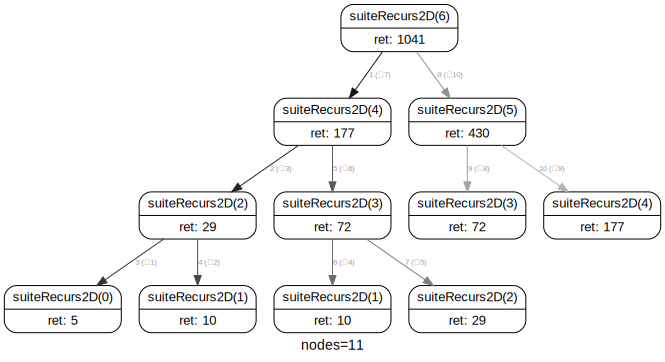

In [49]:
suiteRecurs2D.callgraph()

## Récursivité sur les chaines

### Palindrome

Un palindrome est un mot dont les lettres lues de gauche à droite sont les mêmes que celles lues de droite à gauche. Les mots kayak, radar, elle, été, ici sont des palindromes.


Proposez une fonction **isPalindrome(chaine)** qui renvoi : True si la chaine passée en argument est un palindrome et False sinon.



In [51]:
@viz
def isPalindrome (chaine):
    if len(chaine) <= 1:
        return True
    elif chaine[0] == chaine[-1]:
        return isPalindrome(chaine[1:-1])
    return False
isPalindrome ('kayak')

True

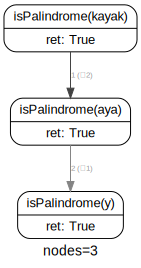

In [52]:
isPalindrome.callgraph()

In [56]:
isPalindrome ('kayuk')

False

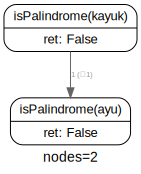

In [57]:
isPalindrome.callgraph()

Visualisez le fonctionnement de votre code avec python tutor

On souhaite maintenant pouvoir utiliser cette fonction sur des phrases palindrome :
- "À révéler mon nom, mon nom relèvera"
- "Engage le jeu que je le gagne"
- "Luc, notre valet, alla te laver ton cul"
- "Eh ! ça va, la vache ?"
- "Noël a trop par rapport à Léon"
- "Élu par cette crapule"
- "Ta bête te bat"

Ecrivez une fonction **formatText(chaine)** qui renvoi chaine en minuscule, sans accent, sans espace ni aucun signe de ponctuation.  
Testez votre fonction isPalindrome sur des phrases palidrome.


In [59]:
def formatText (text):
    #tout en minuscule
    text = text.lower()
    #suppression des accents
    for u in 'éèêë':
        text = text.replace(u, 'e')
    for u in 'àâä':
        text = text.replace(u, 'a')
    for u in 'îï':
        text = text.replace(u, 'i')
    for u in 'ùûü':
        text = text.replace(u, 'u')
    for u in 'ôö':
        text = text.replace(u, 'o')
    text = text.replace('ç', 'c')
    #suppression des caractères autre que les lettres
    newText = ""
    for lettre in text:
        if ord(lettre) >= ord('a') and ord(lettre) <= ord('z') :
            newText += lettre
    
    return (newText)
formatText ("À révéler mon nom, mon nom relèvera")

'arevelermonnommonnomrelevera'

In [60]:
isPalindrome (formatText ("À révéler mon nom, mon nom relèvera"))

True

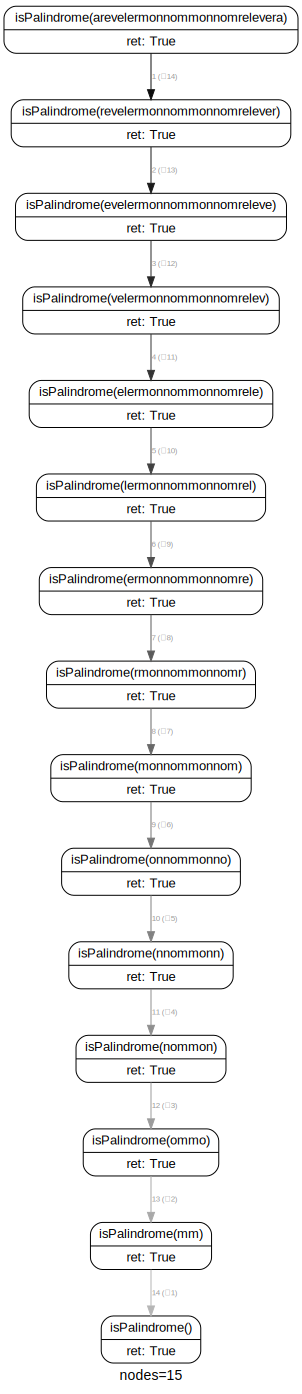

In [61]:
isPalindrome.callgraph()

### Occurrence dans une chaine


Ecrivez une fonction récursive **nbOccurence(chaine, x)** qui retourne le nombre d’occurrence d’une lettre (ou d’un signe de ponctuation) x dans une chaine. Cette fonction devra respecter la casse et les accents : à ≠ a, A ≠ a, …  
Evidemment vous n’avez pas le droit d’utiliser count() ! En fait, on est même en train de réécrire count().


In [62]:
@viz
def nbOccurence(chaine, c):
    #condition d'arret
    if len(chaine) == 1:
        if chaine == c:
            return 1
        return 0
    #appel récursif
    else:
        return nbOccurence(chaine[:len(chaine)//2], c) + nbOccurence(chaine[len(chaine)//2:], c)
nbOccurence("abracadabra", 'a')

5

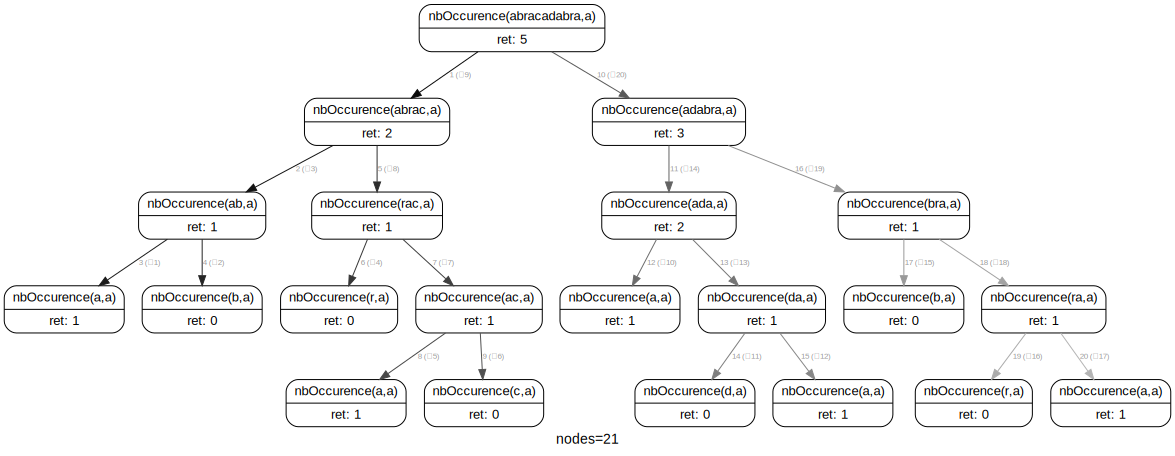

In [63]:
nbOccurence.callgraph()